In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
%matplotlib inline  

In [2]:
data_df = pd.read_csv('RegData.csv', names=['X','y'])
#data_df.head()
data_df.shape

(13, 2)

In [3]:
n_rows = data_df.shape[0]

In [4]:
x_new=np.linspace(0,20).reshape(50,1)
ones = np.ones((50,1))
X = np.concatenate((ones, x_new), axis=1)
y=x_new*-2 + 1

In [5]:
X.shape, y.shape

((50, 2), (50, 1))

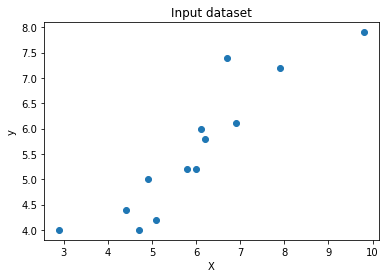

In [6]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [7]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    #print(theta)
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [8]:
compute_cost(X,y)

array([249.8877551])

In [9]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),V=np.array([[0],[0]]), alpha=0.01, num_iterations=1500,jama=0.9):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        
        
        error = (np.dot(X, theta) - y)
        term0 = (1/m) * sum(error* X[:,[0]].reshape(m,1))
        term1 = (1/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        # print(term_vector)
        
        V = jama * term_vector.reshape(2,1) + (1 - jama )* V  
        
        theta = theta - alpha* V
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [10]:
%%time
alpha=0.000001
num_iterations=20000
theta_init=np.array([[2],[2]])
v_init=np.array([[0],[0]])
jama=0.9
theta, J_history, theta0_history, theta1_history = gradient_descent(X ,y , theta_init, v_init , alpha , num_iterations,jama)

Wall time: 3.9 s


In [11]:
theta

array([[ 1.71510427],
       [-1.78181461]])

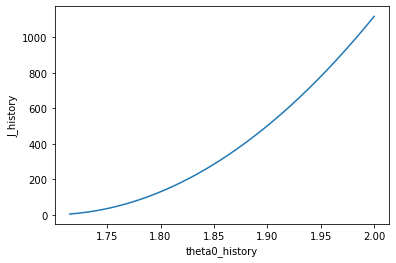

In [12]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

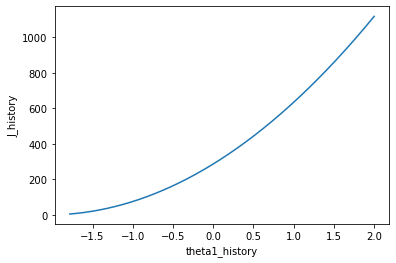

In [13]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

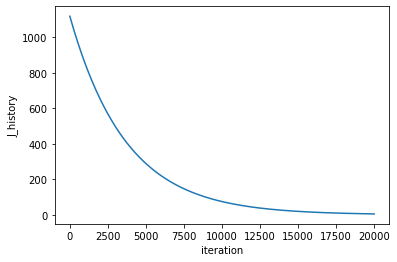

In [14]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

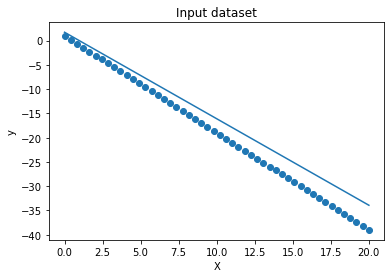

In [15]:
plt.scatter(x = X[:,1] , y = y )
plt.plot( X[:,1] , theta[1]*X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

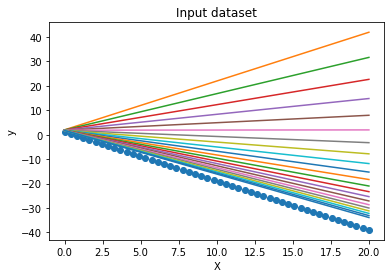

In [16]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] + theta[0]  )
for i in range(1, 20000 ,1000):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [17]:
#NAG

In [18]:
y.shape

(50, 1)

In [19]:
def gradientt_descent(X, y, theta=np.array([[0],[0]]),V=np.array([[0],[0]]), alpha=0.01, num_iterations=1500,jama=0.9):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    w_temp=np.array([[0],[0]])
    
    for i in range(num_iterations):
        
        w_temp = theta - (jama *V)
        
        error  = (X@ w_temp) - y
        term0  = (1/m) * sum(error* X[:,[0]].reshape(m,1))
        term1  = (1/m) * sum(error* X[:,[1]].reshape(m,1))
        
        # update theta
        term_vector = np.array([term0,term1])
        # print(term_vector)
        
        V = jama * term_vector.reshape(2,1) + (1 - jama )* V  
       
        theta = w_temp - (alpha * term_vector)
        V = jama * V + alpha* term_vector  
        
        # store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X,y,theta)[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [20]:
%%time
alpha=0.000000000001
num_iterations=200
theta_init=np.array([[2],[2]])
v_init=np.array([[0],[0]])
jama=0.07
theta, J_history, theta0_history, theta1_history = gradientt_descent(X ,y , theta_init, v_init , alpha , num_iterations,jama)

Wall time: 73 ms


In [21]:
theta

array([[ 1.6856704 ],
       [-2.05084782]])

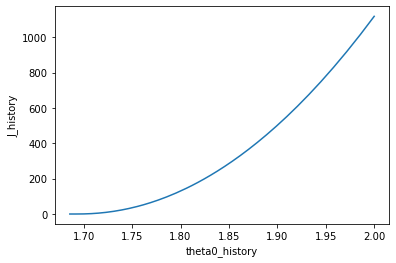

In [22]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta0_history")
plt.plot(theta0_history,J_history )

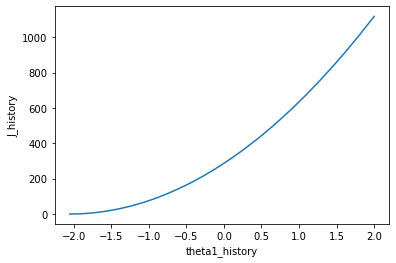

In [23]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("theta1_history")
plt.plot(theta1_history,J_history )

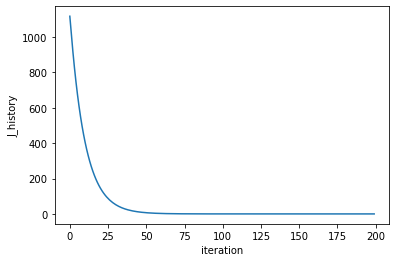

In [24]:
fig, ax1 = plt.subplots()
ax1.set_ylabel("J_history")
ax1.set_xlabel("iteration")
plt.plot(J_history )

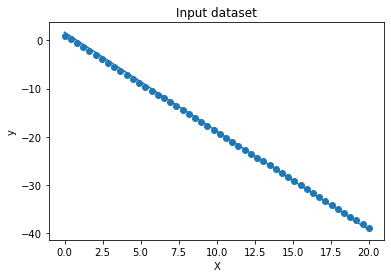

In [25]:
plt.scatter(x = X[:,1] , y = y )
plt.plot( X[:,1] , theta[1]*X[:,1]+theta[0] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

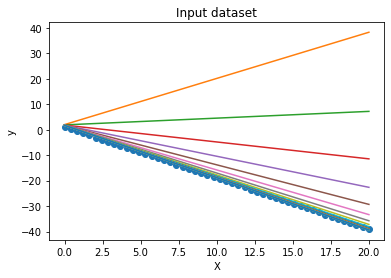

In [26]:
plt.scatter(x=X[:,1], y=y)
plt.plot( X[:,1] , theta[1]* X[:,1] + theta[0]  )
for i in range(1, 200 ,10):
    plt.plot( X[:,1] , theta1_history[i]*X[:,1]+theta0_history[i] )
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');